In [1]:
import os
import sv as SV
import numpy as np
import astropy.table as atable

from desitarget.sv1.sv1_targetmask import bgs_mask as sv1_bgs_mask
from desitarget.sv3.sv3_targetmask import bgs_mask as sv3_bgs_mask

from gama import gama_match

In [2]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
# load compiled zsuccess rates to file
dat_dir = '/global/cfs/cdirs/desi/users/chahah/bgs-cmxsv/sv-paper/'

sv1_gals = atable.Table.read(os.path.join(dat_dir, 'sv1.bgs_exps.efftime160_200.zsuccess.fuji.fits'))
sv3_gals = atable.Table.read(os.path.join(dat_dir, 'sv3.bgs_exps.efftime160_200.zsuccess.fuji.fits'))
main_gals = atable.Table.read(os.path.join(dat_dir, 'main.bgs_exps.efftime160_200.zsuccess.guadalupe.fits'))

SV1
6129 matching galaxies


/tmp/ipykernel_29491/3927384631.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print('%f of them |dz/(1+z)| > 1e-3' % (np.sum(np.abs((z_bgs - z_gama)/(1+z_bgs)) > 1e-3)/np.float(len(z_gama))))


0.002774 of them |dz/(1+z)| > 1e-3
sigma_dz = 45.999 km/s
1\%
42192 matching galaxies
0.001683 of them |dz/(1+z)| > 1e-3
sigma_dz = 42.683 km/s
Main
10283 matching galaxies
0.001750 of them |dz/(1+z)| > 1e-3
sigma_dz = 42.577 km/s


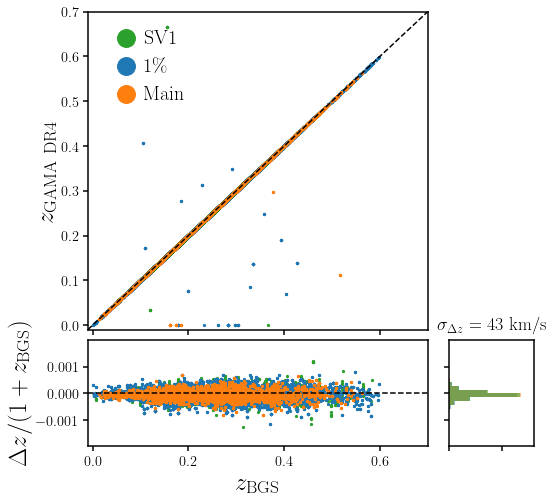

In [11]:
fig, ((sub0, sub2), (sub1, sub3)) = plt.subplots(2, 2, gridspec_kw={'height_ratios': [3, 1], 'width_ratios': [4, 1]}, figsize=(8,8))

for cat, label, clr in zip([sv1_gals, sv3_gals, main_gals], ['SV1', '1\%', 'Main'], ['C2', 'C0', 'C1']):
    cat  = gama_match(cat, dr=4)
    
    mask = cat['GAMA_Z'].mask
    
    cuts = (~mask & 
            (cat['ZSUCCESS'].data == True) & 
            (cat['GAMA_NQ'].data >= 3) & # only high quality GAMA redshifts
            (cat['GAMA_SURVEY_CODE'].data >= 3) # GAMA I & II (excluding sub programs)
           )
    
    z_gama = cat['GAMA_Z'].data[cuts]
    z_bgs = cat['Z'].data[cuts]
    
    dz = z_bgs - z_gama 
    dv = 3.e5 * dz 
    sigma_dv = 0.5 * (np.nanquantile(dv, 0.84) - np.nanquantile(dv, 0.16))
    
    sub0.scatter(z_bgs, z_gama, s=5, c=clr, rasterized=True, label=label)
    sub1.scatter(z_bgs, (z_bgs - z_gama)/(1+z_bgs), s=5, c=clr, rasterized=True, label=label)        
    
    ybin = np.array(list(np.linspace(0., 1e-3, 8)[1:-1]) + list(np.logspace(-3, np.log10(0.9), 8)))
    ybin = np.concatenate([-1*ybin[::-1], np.array([0]), ybin])
    sub3.hist((z_bgs - z_gama)/(1+z_bgs), bins=ybin, orientation='horizontal', density=True, alpha=0.5)
    print(label)
    print('%i matching galaxies' % len(z_gama))
    print('%f of them |dz/(1+z)| > 1e-3' % (np.sum(np.abs((z_bgs - z_gama)/(1+z_bgs)) > 1e-3)/np.float(len(z_gama))))
    print('sigma_dz = %.3f km/s' % sigma_dv)
sub0.plot([-0.01, 1.], [-0.01, 1.], c='k', ls='--')
sub0.set_xlim(-0.01, 0.7)
sub0.set_xticklabels([])
sub0.set_ylim(-0.01, 0.7)
sub0.set_ylabel(r'$z_{\rm GAMA~DR4}$', fontsize=25)
sub0.legend(loc='upper left', handletextpad=-0.1, markerscale=8, fontsize=20)    

sub1.axhline(0, color='k', linestyle='--')
sub1.set_xlim(-0.01, 0.7)
#sub1.set_ylim(-0.9, 0.9)
sub1.set_ylim(-2e-3, 2e-3)
#sub1.set_yticklabels([-0.1, -1e-3, 0, 1e-3, 1e-1])
sub1.set_yticks([-1e-3, 0, 1e-3])
#sub1.set_yscale('symlog', linthresh=1e-3)
sub1.set_ylabel(r'$\Delta z / (1+z_{\rm BGS})$', fontsize=25)
sub1.set_xlabel(r'$z_{\rm BGS}$', fontsize=25)

sub2.axis('off')

sub3.set_xlim(0., 4e3)
sub3.set_xticklabels([])
sub3.set_ylim(-2e-3, 2e-3)
#sub3.set_yscale('symlog', linthresh=1e-3)
sub3.set_yticks([-1e-3, 0, 1e-3])
sub3.set_yticklabels([])
sub3.set_title(r'$\sigma_{\Delta z} = %.f$ km/s' % sigma_dv, fontsize=18, pad=10)

fig.subplots_adjust(hspace=0.05, wspace=0.1)
fig.savefig('figs/gama_zcomp.pdf', bbox_inches='tight')

In [12]:
zs_bgs, zs_gama, surveys = [], [], []
for cat, survey in zip([sv1_gals, sv3_gals, main_gals], ['SV1', 'SV3', 'MAIN']):
    cat  = gama_match(cat, dr=4)
    
    mask = cat['GAMA_Z'].mask
    
    cuts = (~mask & 
            (cat['ZSUCCESS'].data == True) & 
            (cat['GAMA_NQ'].data >= 3) & # only high quality GAMA redshifts
            (cat['GAMA_SURVEY_CODE'].data >= 3) # GAMA I & II (excluding sub programs)
           )
    
    zs_gama.append(np.array(cat['GAMA_Z'].data[cuts]))
    zs_bgs.append(np.array(cat['Z'].data[cuts]))
    surveys.append(np.repeat(survey, np.sum(cuts)))

In [43]:
np.savetxt('dat/fig16_z_bgs_gama.dat', 
           np.vstack([np.concatenate(zs_bgs).astype(np.float32), np.concatenate(zs_gama), np.concatenate(surveys)]).T, 
           fmt='%s', header='BGS vs GAMA DR4 redshift comparison\n z_BGS, z_GAMA, program')